### Dealing with missing data

In [1]:
import pandas as pd
from io import StringIO
csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
0.0,11.0,12.0,'''
#Python 2.7 needs to convert string to unicode
csv_data = unicode(csv_data)
df = pd.read_csv(StringIO(csv_data))
df


,A,B,C,D
0,1,2,3,4
1,5,6,NaN,8
2,0,11,12,NaN


In [2]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [3]:
# remove nas
df.dropna()

,A,B,C,D
0,1,2,3,4


In [4]:
# drop columns with >= 1 nan
df.dropna(axis=1)

,A,B
0,1,2
1,5,6
2,0,11


In [5]:
# only dorp rows where all columns are NaN
df.dropna(how='all')

,A,B,C,D
0,1,2,3,4
1,5,6,NaN,8
2,0,11,12,NaN


In [6]:
# drop rows that have not at least 4 non-NaN values
df.dropna(thresh=4)

,A,B,C,D
0,1,2,3,4


In [7]:
# only drop rows where NaN appear in specific columns
# (here: 'C')
df.dropna(subset=['C'])

,A,B,C,D
0,1,2,3,4
2,0,11,12,NaN


### Imputing missing values

In [8]:
# replace with feature (column) mean
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data

array([[  1. ,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [  0. ,  11. ,  12. ,   6. ]])

## Handling categorical data

In [9]:
import pandas as pd
df = pd.DataFrame([
        ['green', 'M', 10.1, 'class1'],
        ['red', 'L', 13.5, 'class2'],
        ['blue', 'XL', 15.3, 'class1']
    ])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [10]:
# map ordinal category size to integers
size_mapping = {
                'XL': 3,
                'L': 2,
                'M': 1}
df['size'] = df['size'].map(size_mapping)
df
# # reverse mapping
# inv_size_mapping = {v: k for k, v in size_mapping.items()}
# df['size'] = df['size'].map(inv_size_mapping)
# df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [11]:
## change class labels to integers
import numpy as np
class_mapping = {label: idx for idx, label in 
                enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [12]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [13]:
## can reverse mapping 
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [14]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0], dtype=int64)

In [15]:
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

## Performing one-hot encoding on nominal features

In [16]:
## Can we map the same as ordinal data? (NO) let's try
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:, 0])
X

array([[1L, 1L, 10.1],
       [2L, 2L, 13.5],
       [0L, 3L, 15.3]], dtype=object)

##### BUT...
we have problem here, the learning algorithm will think that the colors are larger than others, e.g. green is larger than blue, and red is larger than green. NOT optimal

In [17]:
# OneHotEncoder via sklearn :)
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

array([[  0. ,   1. ,   0. ,   1. ,  10.1],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

In [18]:
# get_dummies from pandas for one-hot encoding
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


### Partitioning a data set, in training and test sets

In [19]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
                     header=None)
df_wine.columns = ['Class label', 'Alcohol', 
                   'Malic acid', 'Ash', 
                   'Alcalinity of ash', 'Magnesium', 
                   'Total phenols', 'Flavanoids',
                   'Nonflavanoid phenols', 
                   'Proanthocyanins', 
                   'Color intensity', 'Hue', 
                   'OD280/OD315 of diluted wines', 
                   'Proline']
print'Class labels', np.unique(df_wine['Class label'])
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [20]:
## Splitting data into train/test set using
## train_test_split from sklearn cross validation mod
from sklearn.cross_validation import train_test_split
# X features besides class lebels, y associated class labels
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   random_state=0)

## Feature Scaling

#### Normaization

In [21]:
## Normalizing
## xi(norm) = (xi - x(min)) / (x(max) - x(min))
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.fit_transform(X_test)

##  if 1D fit to train data, want same transformation 
## for both sets, so only transform test dataset
# passing 1D array depreciated this is the fix
# X_train_norm = mms.fit_transform(X_train.reshape(len(X_train),1))
# X_test_norm = mms.transform(X_test.reshape(len(X_test), 1))

In [22]:
# print X_test
# X_test.reshape(len(X_test), 1)

#### Standardization

In [23]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
## fit to train data, want same transformation 
## for both sets, so only transform test dataset
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

## Selecting meaningful features
 - Avoiding overfitting

#### Sparse solutions with L1 regularization

In [24]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)
print 'Training accuracy:', lr.score(X_train_std, y_train)
print 'Test accuracy:', lr.score(X_test_std, y_test)

Training accuracy: 0.983870967742
Test accuracy: 0.981481481481


In [26]:
lr.intercept_ #represent class intercepts 1,2,3

array([-0.38384088, -0.15810131, -0.70041945])

In [27]:
lr.coef_ # weight array, for each class

array([[ 0.28039835,  0.        ,  0.        , -0.02782507,  0.        ,
         0.        ,  0.71023299,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23582443],
       [-0.64390261, -0.06883371, -0.05719607,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92694449,
         0.0600286 ,  0.        , -0.37102962],
       [ 0.        ,  0.06151507,  0.        ,  0.        ,  0.        ,
         0.        , -0.63605889,  0.        ,  0.        ,  0.49808999,
        -0.35826046, -0.57124697,  0.        ]])

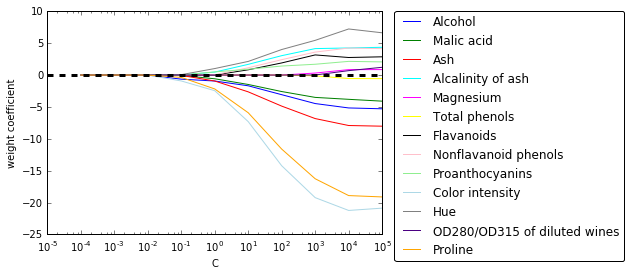

In [28]:
## plotting the regularization path
### which is th eweight coefficients of the different features
### for different regularization strengths
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = plt.subplot(111)   
colors = ['blue', 'green', 'red', 'cyan', 
         'magenta', 'yellow', 'black', 
         'pink', 'lightgreen', 'lightblue', 
         'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4, 6):
    lr = LogisticRegression(penalty='l1', 
                            C=10**c, 
                            random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column+1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

## Sequencetial feature selection algorithms

#### Sequential Backward Selection (SBS)
 1. Initialize algorithm with k=d, where d is dimensionality of full feature space.
 2. Determine feature x^- that maximizes criterion.
 3. Remove feature x^- from the feature set.
 4. Terminate if k equals the number of desired features, if not go to step 2.
 
aka Backward stepwise selection

In [29]:
# from sklearn.base import clone
# from itertools import combinations
# import numpy as np
# from sklearn.cross_validation import train_test_split
# from sklearn.metrics import accuracy_score

# class SBS():
#     def __init__(self, estimator, k_features,
#                 scoring=accuracy_score,
#                 test_size=0.25, random_state=1):
#         self.scoring = scoring
#         self.estimator = clone(estimator)
#         self.k_features = k_features
#         self.test_size = test_size
#         self.random_state = random_state
        
#     def fit(self, X, y):
#         X_train, X_test, y_train, y_test = train_test_split(
#                         X, y, test_size=self.test_size,
#                         random_state = self.random_state)
        
#         dim = X_train.shape[1]
#         self.indices_ = tuple(range(dim))
#         self.subsets_ = [self.indices_]
#         score = self._calc_score(X_train, y_train,
#                                 X_test, y_test, self.indices_)
#         self.scores_ = [score]
        
#         while dim > self.k_features:
#             scores = []
#             subsets = []
            
#             for p in combinations(self.indices_, r=dim-1):
#                 score = self._calc_score(X_train, y_train,
#                                         X_test, y_test, p)
#                 scores.append(score)
#                 subsets.append(p)
            
#             best = np.argmax(score)
#             self.indices_ = subsets[best]
#             self.subsets_.append(self.indices_)
#             dim -= 1
            
#             self.scores_.append(scores[best])
#         self.k_score_ = self.scores_[-1]
        
#         return self
    
#     def transform(self, X):
#         return X[:, self.indices_]
    
#     def _calc_score(self, X_train, y_train,
#                            X_test, y_test, indices):
#         self.estimator.fit(X_train[:, indices], y_train)
#         y_pred = self.estimator.predict(X_test[:, indices])
#         score = self.scoring(y_test, y_pred)
#         return score
    
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    def __init__(self, estimator, k_features, 
        scoring=accuracy_score,
        test_size=0.25, random_state=1):
        
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
                train_test_split(X, y, test_size=self.test_size, 
                                 random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, 
                          X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [30]:
## SBS using KNN classifier from sklearn
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

<__main__.SBS instance at 0x0000000008348808>

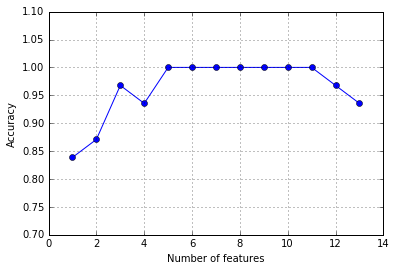

In [31]:
## plotting classification accuracy of knn
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

## NOTE
can tell accuracy of KNN classifier improved on validation set as we reduced number of features, likely due to decrease of the <b>curse of dimensionality</b>.

In [32]:
## Let's see 5 features that yeilded good performance
k5 = list(sbs.subsets_[8])
print df_wine.columns[1:][k5]

Index([u'Alcohol', u'Malic acid', u'Alcalinity of ash', u'Hue', u'Proline'], dtype='object')


In [33]:
## let's evaluate performance of KNN on original test set
knn.fit(X_train_std, y_train)
print 'Training accuracy:', knn.score(X_train_std, y_train)
print 'Testing accuracy:', knn.score(X_test_std, y_test)
## testing slightly lower, indicator of slight overfit

Training accuracy: 0.983870967742
Testing accuracy: 0.944444444444


In [34]:
# let's use 5-feature subset from above
knn.fit(X_train_std[:, k5], y_train)
print 'Training accuracy:', knn.score(X_train_std[:, k5], y_train)
print 'Testing accuracy:', knn.score(X_test_std[:, k5], y_test)

Training accuracy: 0.959677419355
Testing accuracy: 0.962962962963


## NOTE
using less than half of the original features, our prediction accuracy on the test data imporove ~2%. And reduced overfitting, we can tell by the small gap between test accuracy and training accuracy

#### PS Notes
many other feature selection algorithms in sklearn. Including recursive backward elimination based on feature weights, tree-based methods to select features by importance, and univariate statistical tests. http://scikit-learn.org/stable/modules/feature_selection.html

### Assessing feature importance with random forests

In [38]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
## create and fit random forest on 10,000 trees
forest = RandomForestClassifier(n_estimators=10000,
                               random_state=0,
                               n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print " %2d) %-*s %f" % (f + 1, 30, feat_labels[f],
                            importances[indices[f]])
 

  1) Alcohol                        0.182483
  2) Malic acid                     0.158610
  3) Ash                            0.150948
  4) Alcalinity of ash              0.131987
  5) Magnesium                      0.106589
  6) Total phenols                  0.078243
  7) Flavanoids                     0.060718
  8) Nonflavanoid phenols           0.032033
  9) Proanthocyanins                0.025400
 10) Color intensity                0.022351
 11) Hue                            0.022078
 12) OD280/OD315 of diluted wines   0.014645
 13) Proline                        0.013916


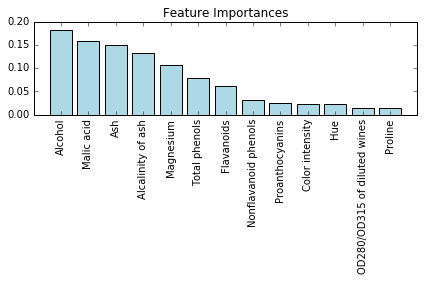

In [41]:
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
       importances[indices],
       color='lightblue',
       align='center')
plt.xticks(range(X_train.shape[1]),
          feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

scikit-learn also implements a transform method that selects features based on a user-specified threshold after model fitting, which is useful if we want to use the RandomForestClassifier as a feature selector and intermediate step in a scikit-learn pipeline, which allows us to connect different preprocessing steps with an estimator, as we will see in Chapter 6, Learning Best Practices for Model Evaluation and Hyperparameter Tuning. For example, we could set the threshold to 0.15 to reduce the dataset to the 3 most important features, <b>Alcohol, Malic acid,</b> and <b>Ash</b> using the following code:

In [49]:
from sklearn.feature_selection import SelectFromModel
X_selected = SelectFromModel(forest, 
                             threshold=0.15, 
                             prefit=True)
abc = X_selected.transform(X_train)
abc.shape

(124L, 3L)

# Summary

We started this chapter by looking at useful techniques to make sure that we handle missing data correctly. Before we feed data to a machine learning algorithm, we also have to make sure that we encode categorical variables correctly, and we have seen how we can map ordinal and nominal features values to integer representations.

Moreover, we briefly discussed L1 regularization, which can help us to avoid overfitting by reducing the complexity of a model. As an alternative approach for removing irrelevant features, we used a sequential feature selection algorithm to select meaningful features from a dataset.

In the next chapter, you will learn about yet another useful approach to dimensionality reduction: feature extraction. It allows us to compress features onto a lower dimensional subspace rather than removing features entirely as in feature selection.